In [4]:
import os
import sys
import cv2
import numpy as np


In [13]:
def video_to_images(video_path, output_path, desired_fps=30):
    video = cv2.VideoCapture(video_path)

    # Get the frames per second (fps) of the video
    fps = video.get(cv2.CAP_PROP_FPS)

    # Calculate the frame interval based on the desired fps
    frame_interval = round(fps / desired_fps)

    # Initialize variables
    frame_count = 0
    success = True

    # Loop through the video frames
    while success:
        # Read the next frame
        success, frame = video.read()
        
        
        # Check if it's time to save the frame
        if frame_count % frame_interval == 0 and frame is not None:
            # Save the frame as an image
            
            image_path = f"{output_path}/frame_{frame_count}.jpg"
            cv2.imwrite(image_path, frame)
        
        # Increment the frame count
        frame_count += 1

    # Release the video file
    video.release()

In [15]:
video_root = '../data/applix_data/videos'
output_root = '../data/applix_data/frames'
video_ids = os.listdir(video_root)
for video_id in video_ids:
    video_path = os.path.join(video_root, video_id)
    output_path = os.path.join(output_root, video_id)
    os.makedirs(output_path, exist_ok=True)
    video_to_images(video_path, output_path, desired_fps=5)


OpenCV: Couldn't read video stream from file "../data/applix_data/videos/.DS_Store"


ZeroDivisionError: integer division or modulo by zero

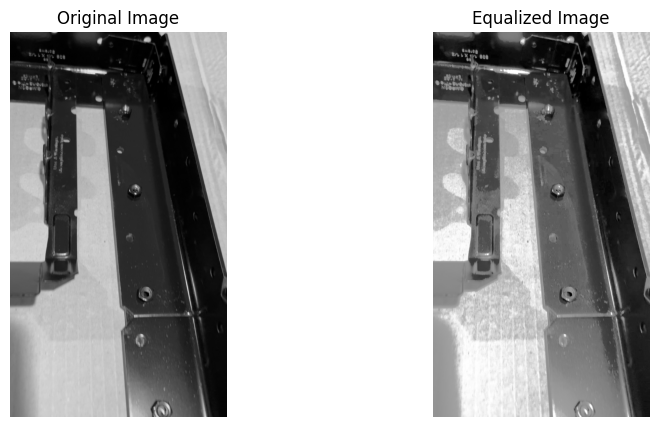

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/ashish/Documents/research/interviews/applix/data/applix_data/frames/0632/frame_348.jpg', 0)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

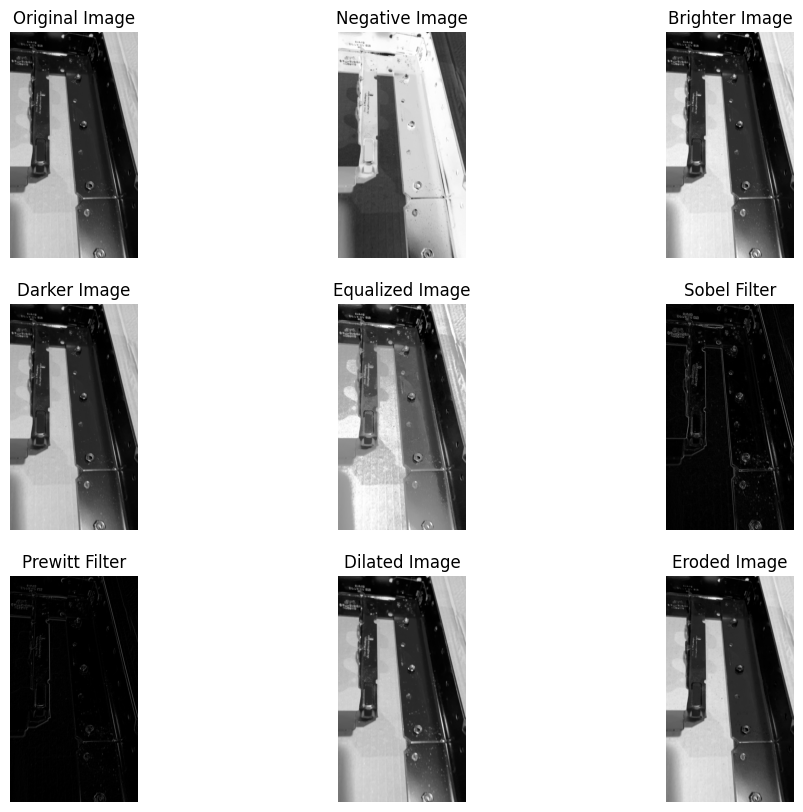

In [7]:

import cv2
import matplotlib.pyplot as plt
import numpy as np


# Intensity transforms
negative_image = 255 - image
brighter_image = cv2.convertScaleAbs(image, alpha=1.2, beta=0)
darker_image = cv2.convertScaleAbs(image, alpha=0.8, beta=0)

# Histogram equalization
equalized_image = cv2.equalizeHist(image)

# Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)

# Prewitt filter
prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_combined = cv2.addWeighted(cv2.convertScaleAbs(prewitt_x), 0.5, cv2.convertScaleAbs(prewitt_y), 0.5, 0)

# Dilation
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Erosion
eroded_image = cv2.erode(image, kernel, iterations=1)

# Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the results
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(brighter_image, cmap='gray')
plt.title('Brighter Image')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(darker_image, cmap='gray')
plt.title('Darker Image')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Filter')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Filter')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.show()

In [14]:
def apply_canny_edge_detection(image_path):
    # Load the image
    image = cv2.imread(image_path, 0)
    image = cv2.equalizeHist(image)
    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Get the directory and filename
    directory, filename = os.path.split(image_path)

    # Append "_canny" to the filename
    new_filename = os.path.splitext(filename)[0] + "_canny.jpg"

    # Save the edges image
    edges_path = os.path.join(directory, new_filename)
    cv2.imwrite(edges_path, edges)

# Specify the directory containing the images
directory = '/Users/ashish/Documents/research/interviews/applix/data/applix_data/frames/0633'

# Iterate over the images in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(directory, filename)
        apply_canny_edge_detection(image_path)

In [13]:
import os
import cv2

def remove_linear_lines(image_path):
    # Load the image
    image = cv2.imread(image_path)


    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(gray, 1, np.pi / 180, threshold=5, minLineLength=50, maxLineGap=10)

    # Draw the detected lines on a blank image
    lines_image = np.zeros_like(image)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 0, 0), 1)

    # Remove the lines from the original image
    # result = cv2.subtract(image, lines_image)

    # Get the directory and filename
    directory, filename = os.path.split(image_path)

    # Append "_lines_removed" to the filename
    new_filename = os.path.splitext(filename)[0] + "_lines_removed.jpg"

    # Save the result image
    result_path = os.path.join(directory, new_filename)
    cv2.imwrite(result_path, lines_image)

# Specify the directory containing the images
directory = '/Users/ashish/Documents/research/interviews/applix/data/applix_data/frames/0633'

# Iterate over the images in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png') and 'canny' not in filename:
        image_path = os.path.join(directory, filename)
        remove_linear_lines(image_path)

error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


In [1]:
import cv2
import numpy as np

def preprocess_frame(frame):
    """Convert to grayscale, apply CLAHE and Gaussian blur."""
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    blurred = cv2.GaussianBlur(enhanced, (5,5), 0)
    return blurred

def template_matching(frame, template):
    """Perform multi-scale template matching."""
    best_match = None
    best_val = -np.inf
    
    for scale in np.linspace(0.5, 1.5, 10):  # Scale variations
        resized_template = cv2.resize(template, None, fx=scale, fy=scale)
        res = cv2.matchTemplate(frame, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        if max_val > best_val:
            best_val = max_val
            best_match = max_loc
            best_scale = scale
    
    return best_match, best_scale, best_val

def detect_edges_and_contours(frame):
    """Detect edges and contours for refining detection."""
    edges = cv2.Canny(frame, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def process_video(video_path, template_path):
    """Process video frame-by-frame."""
    cap = cv2.VideoCapture(video_path)
    template = cv2.imread(template_path, 0)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        processed = preprocess_frame(frame)
        match_loc, scale, confidence = template_matching(processed, template)
        contours = detect_edges_and_contours(processed)
        
        if confidence > 0.6:  # Confidence threshold
            h, w = template.shape
            h, w = int(h * scale), int(w * scale)
            cv2.rectangle(frame, match_loc, (match_loc[0] + w, match_loc[1] + h), (0, 255, 0), 2)
        
        cv2.imshow("Bolt Detection", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Example usage
process_video("/Users/ashish/Documents/research/interviews/applix/data/applix_data/videos/0630.MOV", 
              "/Users/ashish/Documents/research/interviews/applix/data/crops/IMG_0628_crop.jpeg")


2025-02-03 15:48:08.803 python[3940:57912] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-03 15:48:08.803 python[3940:57912] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 